![title](http://cs.nott.ac.uk/~pszgss/teaching/nlab.png)
<p style="text-align: center;">
<big><big><big><b>Practical 9: Recurrent Neural Networks & Convolutional Neural Networks</b></big></big></big>
</p>


## Task 1
For today's problem we are going to be considering next step univariate prediction.

The data is a pre-normalized version of House Sales data across the US.


## Requirements: 
If you haven't already installed tensorflow you will need to do this via pip3:

`sudo pip3 install tensorflow`

Keras is also required. Install it via:

`sudo pip3 install keras`

If you are using your own computer and have used Anaconda please use conda instead of pip3.

First, let's ensure we import everything. Since we're using a Neural Network we are going to use a MinMaxScaler to scale our time series in addition to the imports we saw in the slides.

While we're at it, let's also set the random seed to we can replicate what we're doing.

In [1]:
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#-- fix the random seed for replication
np.random.seed(0)


Next, the standard **read our data in...**. This is filled in for you with the correct URL to read the data from.

Since it is a single time series we are going to first ensure it is ordered by date, and the delete the date column so we are just left with our univariate time series. 

**NOTE:** In practice we probably should check to ensure that we were not missing time points (how? read the pandas docs.)

**What we are left with is a DataFrame (matrix) with a single column (remember this is a time series)**.

We'll then convert the data into a 1D array for easier manipulation (optional).

The time series is already normalized, so we will leave it as is. It is also already ordered (first row is the the oldest record).

In [2]:
#-- Let's read our univariate timeseries in
data = pd.read_csv('practical_11.csv', header = None).values

# We're also going to use a history length of 7, so let's define this
HISTORY = 7

Now your turn. Having listened to the lecture you should now know what to do.  Split the data into training and test set.

**HINT:** Check your input data format. It is **not** the same as in the example on the slides. You need to adapt that example to this format. 



In [3]:
#-- create the test and training sets.
#-- Train your model using all data except the last 33 points.
#-- Evaluate your model by predicting (next step prediction) the last 33 points. 
#-- Do not retrain your model between predictions.
#-- Recall your model is predicting the next time point given 7 lagged features.

X = []
y = []

# for each ref date from the first possible to the last
for ref_date in range(HISTORY,len(data)):
    y.append( data[ref_date] )
    X.append( data[(ref_date-HISTORY):ref_date] )

In [4]:
## split the data into training and testing dataset
X_train = X[0:76]
X_test = X[76:]
y_train = y[0:76]
y_test = y[76:]

Generate the testing and training sets. Ensure they are numpy arrays with the correct shape.

**RECALL:** The shape for X_train should be (num_instances, history length, dimension per time point)

In [5]:
## transform the list format into array
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

Define the nework.

HINT: 

Start with: model = Sequential()

End with: model.compile(...)


In [6]:

#-- create and fit the LSTM network - first a sequential model (a linear stack of layers)
model = Sequential()

#-- next add an LSTM layer, specifying the hidden nodes and the input size 
NODES = 12
model.add(LSTM(NODES, activation='elu', input_shape=(HISTORY,1)))

#-- add an output layer, producing a single output prediction
model.add(Dense(1,activation='elu'))

# compile and then fit the model
model.compile(loss='mean_squared_error', optimizer='adam')

Fit the model and make your prediction on your test set!!

In [7]:
# -- fit the model
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
76/76 - 2s - loss: 0.0066
Epoch 2/50
76/76 - 0s - loss: 0.0043
Epoch 3/50
76/76 - 0s - loss: 0.0040
Epoch 4/50
76/76 - 0s - loss: 0.0039
Epoch 5/50
76/76 - 0s - loss: 0.0037
Epoch 6/50
76/76 - 0s - loss: 0.0038
Epoch 7/50
76/76 - 0s - loss: 0.0035
Epoch 8/50
76/76 - 0s - loss: 0.0035
Epoch 9/50
76/76 - 0s - loss: 0.0034
Epoch 10/50
76/76 - 0s - loss: 0.0034
Epoch 11/50
76/76 - 0s - loss: 0.0032
Epoch 12/50
76/76 - 0s - loss: 0.0033
Epoch 13/50
76/76 - 0s - loss: 0.0034
Epoch 14/50
76/76 - 0s - loss: 0.0031
Epoch 15/50
76/76 - 0s - loss: 0.0031
Epoch 16/50
76/76 - 0s - loss: 0.0030
Epoch 17/50
76/76 - 0s - loss: 0.0029
Epoch 18/50
76/76 - 0s - loss: 0.0031
Epoch 19/50
76/76 - 0s - loss: 0.0028
Epoch 20/50
76/76 - 0s - loss: 0.0028
Epoch 21/50
76/76 - 0s - loss: 0.0027
Epoch 22/50
76/76 - 0s - loss: 0.0027
Epoch 23/50
76/76 - 0s - loss: 0.0025
Epoch 24/50
76/76 - 0s - loss: 0.0025
Epoch 25/50
76/76 - 0s - loss: 0.0025
Epoch 26/50
76/76 - 0s - loss: 0.0025
Epoch 27/50
76/76 - 0

In [8]:
#-- make predictions
test_predict = model.predict(X_test)

Evaluate your predictions

In [9]:
t_e = mean_absolute_error(y_test, test_predict)
print('Test Error: {}'.format(t_e))

Test Error: 0.06202250434057942


Now let's plot the predictions. I've included the code to plot the data if you used the same variables as me when I implemented the solution. You may need to change it to fit your variables. 

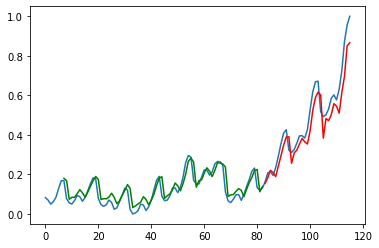

In [10]:
# First lets also predict the training section so we can plot that too
train_predict = model.predict(X_train)

plt.plot(data)

# plot the fit of the model to the training set
lead = [[np.nan]] * (HISTORY)
train_predict = np.concatenate((lead, train_predict), axis=0)
plt.plot(train_predict, color='g')

#-- plot the fit of the model to the test set
lead = [[np.nan]] * (76 + HISTORY)
test_predict = np.concatenate((lead, test_predict), axis=0)
plt.plot(test_predict, color='r')

#-- show the results on screen
plt.show()

## Task2: Image Classification With CNN

The MNIST database of handwritten digits is a collection of labeled images that has been used to evaluate machine learning techniques since the '90's. The core application of the MNIST data is to train computer vision systems to recognize handwritten text. The post office, for example, is a major user of such systems---addresses on letters and packages are all photographed, read, and routed digitally, with only a few ambiguous cases verified by a human.

The MNIST data set has also become a reliable benchmark for learning methods. It's small, but not tiny, and the data dimensionality (28x28 pixels) is big enough to cause some "curse of dimensionality" issues. Also, the problem is highly non-linear, meaning a linear classification methods (like linear regression, but for predicting discete categories) don't perform so well on the raw data. The MNIST website reports an extensive list of results obtained by different machine learning models, including neural nets, SVM, nearest neighbors, and others.

The data consists of 60,000 training images and 10,000 test images. Each image is a 28x28 pixel, grayscale picture of a digit written either by a highschool student or an employee of the US Census Bureau. The images have all been preprocessed to be clean and regular: only one digit appears in each image, and it appears directly in the center of the image.

The goal of the benchmark is to fit a model to the training set, and then use that model to predict which digit is in each of the test images. The best results achieve a classification error rate of less than half of one percent. This is often described as the "human error rate," because if you ask people to classify the images, they will also find about 0.5% of them to be comepletely inscutable.

In [11]:
## loading the data with format .mat using io.loadmat
import scipy.io as io
mnist=io.loadmat('mnist-original.mat')

In [12]:
## mnist is a dictionary, it indicate several info. the main part of data were stored in mnist['data'] and mnist['label']
## mnist['data'] are a set of vetors between 0 to 1. They are (28 pixels * 28pixels) size images. 
## The images are handwrittings digits, i.e., 0,1,2,3,...9
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [13]:
mnist['data'].shape

## looking at the shape the mnist data, we can see there 70000 images in this data dateset
## 784=28*28, the 1D vector is the flattened 2D image pixels.

(784, 70000)

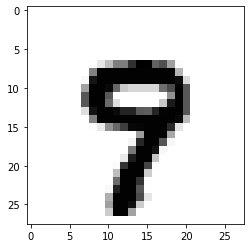

In [14]:
## random select a data point from the dataset, transform the 1D vector into (28,28) 2D matrix
img=mnist['data'].transpose().reshape(70000,28,28)
label=mnist['label'].transpose()

## plot the matrix to show the digits. 
img_select=img[56000]
plt.imshow(img_select.reshape(28, 28), cmap="Greys")
plt.show()

In [15]:
## split the data into train and test dataset
X_train, X_test, y_train, y_test = img[:60000], img[60000:], label[:60000],label[60000:]

In [16]:
## the orignal dataset is stored in ascending order, so we need to permutate the data points order.
shuffle_index =  np.random.permutation(60000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

Before feeding the data into the CNN, we'd better scale the data into 0 to 1. Because they are already fitted, we will skip the normalization step.

## Build the model with basic dence layer

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.



In [17]:
## We use the Flatten to transform the 2D matrix into 1D vector to fit the dense layer

from keras.layers import Dense,Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

In [18]:
## compile the model
from keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
## train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 7.1455 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3972 - accuracy: 0.9037
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9284
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9338
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2310 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2038 - accuracy: 0.9478
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9479
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1969 - accuracy: 0.9523
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1790 - accuracy: 0.9548
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.171

In [20]:
## evalute the accuray
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.2584 - accuracy: 0.9481
Test accuracy: 0.9480999708175659


# Build the CNN model

The model consists of two convolution blocks with a max pool layer in each of them.
you can use

`Conv2D(filters=16,kernel_size=(3,3),strides=(1,1), input_shape=(28,28,1), padding='same', activation='relu')`

and 

`MaxPooling2D()`

think about the what's the meaning of parameters here

In [21]:
num_classes = 10
from keras.layers import Conv2D, Flatten, MaxPooling2D
model = Sequential([
  Conv2D(filters=16,kernel_size=(3,3),strides=(1,1), input_shape=(28,28,1), padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32,kernel_size=(3,3), padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(num_classes)
])

## Model summary

View all the layers of the network using the model's `summary` method:

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
__________________________________________________

In [23]:
## compile the data
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
## add new dimension at the end of X_train and X_test, because the default the input dimension should be 4
## the meaning of each dimension is [batch_size, image_height, image_weight, image_channel]
## for grayscale channel, it only contains 1 channel. For RGB colorful pictures, it will contains 3 channels.
X_train_new=X_train[:,:,:,None].astype('float32')
X_test_new=X_test[:,:,:,None].astype('float32')

In [ ]:
epochs=8

history = model.fit(X_train_new,y_train,
    batch_size=30,
    validation_data=(X_test_new,y_test),
    epochs=epochs
)

Epoch 1/8
2000/2000 [==============================] - 35s 17ms/step - loss: 1.4896 - accuracy: 0.8739 - val_loss: 0.0785 - val_accuracy: 0.9748
Epoch 2/8
2000/2000 [==============================] - 37s 18ms/step - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0693 - val_accuracy: 0.9794
Epoch 3/8
2000/2000 [==============================] - 27s 13ms/step - loss: 0.0597 - accuracy: 0.9817 - val_loss: 0.0860 - val_accuracy: 0.9740
Epoch 4/8
2000/2000 [==============================] - 33s 16ms/step - loss: 0.0472 - accuracy: 0.9857 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 5/8
2000/2000 [==============================] - 32s 16ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0548 - val_accuracy: 0.9846
Epoch 6/8
1961/2000 [============================>.] - ETA: 0s - loss: 0.0367 - accuracy: 0.9885

In [51]:
## evalute the accuray
test_loss, test_acc = model.evaluate(X_test_new,  y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0661 - accuracy: 0.9841
Test accuracy: 0.9840999841690063


In [53]:
history

(0.0, 1.1)

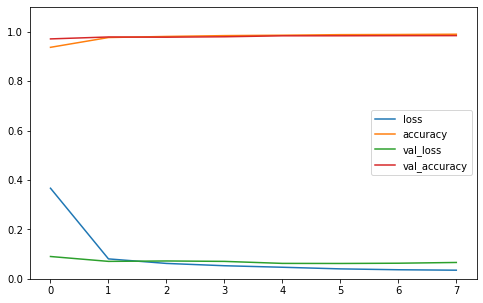

In [56]:
## plot your model
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1.1)